In [16]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [17]:

# Load the image (make sure Lenna.jpg is in the same directory or give full path)
image = cv2.imread('lena.jpg')


In [18]:
# Convert BGR (OpenCV format) to RGB (matplotlib format)
# Since OpenCV loads images in BGR format, we need to convert it to RGB for correct color representation in matplotlib.
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

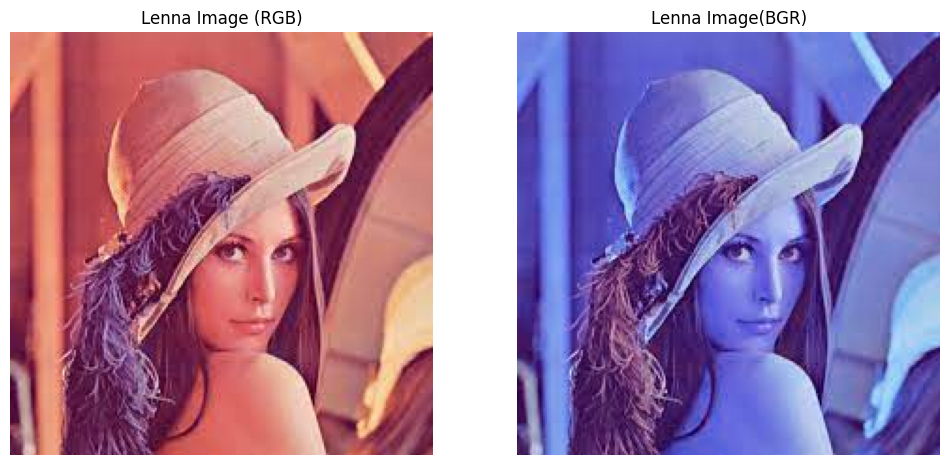

In [19]:
# Display the image RGB image and BGR image using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Lenna Image (RGB)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title("Lenna Image(BGR)")
plt.axis('off')
plt.show()


In [20]:
#prints the height, width, and number of channels of the image
print("Image shape in BGR : ",image.shape)  # Print the shape of the image
print("Image shape in RGB : ", image_rgb.shape)  # Print the shape of the RGB image

Image shape in BGR :  (225, 225, 3)
Image shape in RGB :  (225, 225, 3)


Use of Sobel Filter

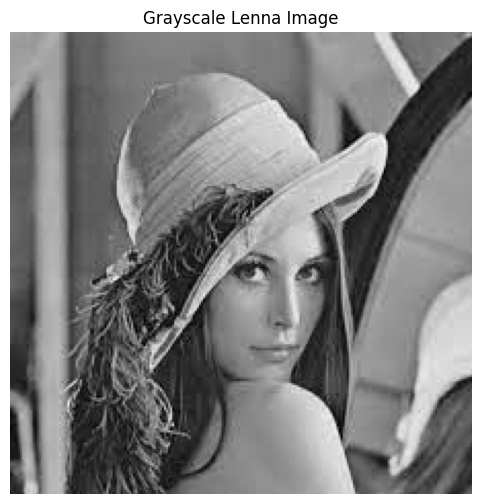

In [21]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(6, 6))          
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Lenna Image")
plt.axis('off')
plt.show()

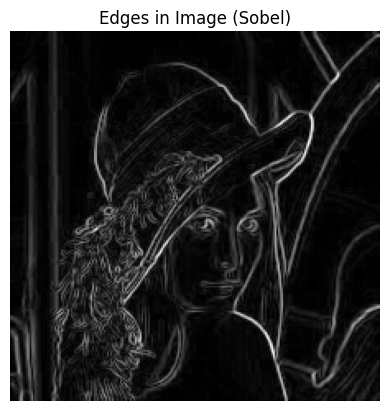

In [22]:
# Apply Sobel filter (horizontal and vertical)
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Combine the gradients
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Display
plt.imshow(sobel_combined, cmap='gray')
plt.title("Edges in Image (Sobel)")
plt.axis('off')
plt.show()

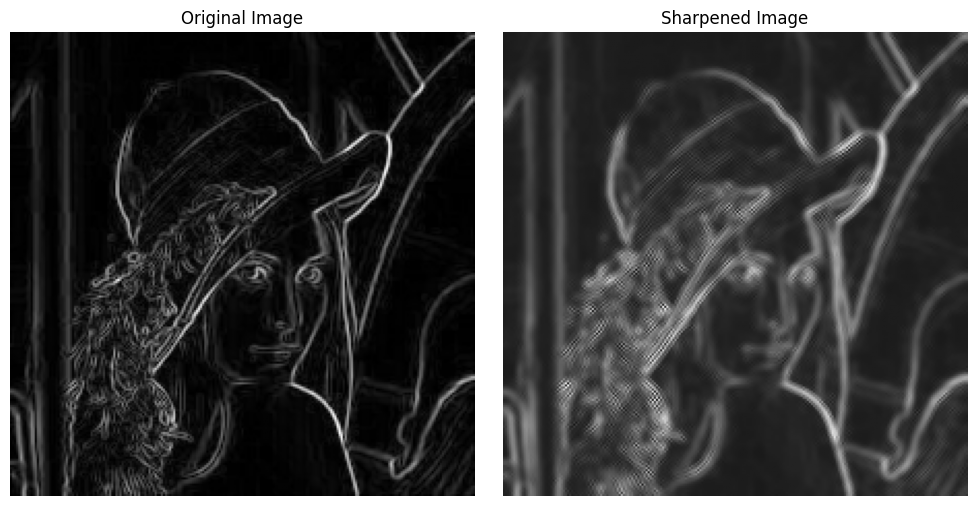

In [23]:
# Sharpening kernel
sharpen_kernel = np.array([[0, -1,  0],
                           [-1, 1,-1],
                           [0, -1,  0]])

sharpened = cv2.filter2D(sobel_combined, -1, sharpen_kernel)
sharpened = cv2.filter2D(sharpened, -1, sharpen_kernel)
# Display original and sharpened
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sobel_combined,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened,cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.tight_layout()
plt.show()

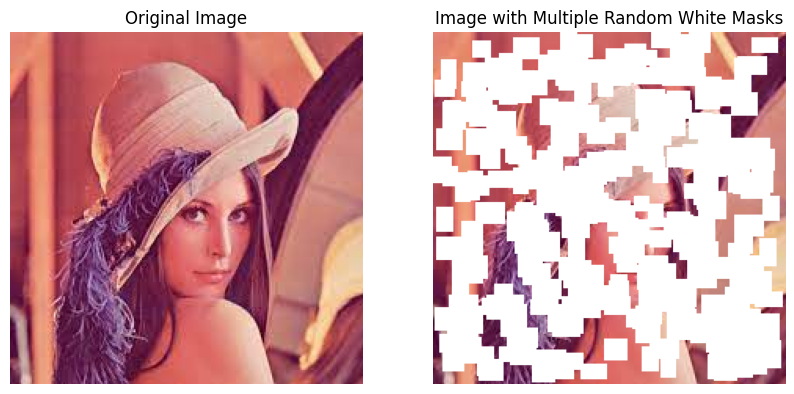

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('lena.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image dimensions
height, width, _ = img.shape

# Create a copy once to apply all masks on it
img_masked = img.copy()

# Number of white boxes
num_boxes = 300

for i in range(num_boxes):
    # Random size for mask (10x10 to 20x20)
    mask_h = np.random.randint(10, 20)
    mask_w = np.random.randint(10, 20)
    
    # Random position (ensure mask fits inside image)
    top_left_x = np.random.randint(0, width - mask_w)
    top_left_y = np.random.randint(0, height - mask_h)
    
    # Apply white mask (255, 255, 255)
    img_masked[top_left_y:top_left_y+mask_h, top_left_x:top_left_x+mask_w] = (255, 255, 255)

# Show original and masked images side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_masked)
plt.title('Image with Multiple Random White Masks')
plt.axis('off')

plt.show()


In [25]:
print(img_masked.shape)  # Print the shape of the masked image

(225, 225, 3)


(225, 225, 3)


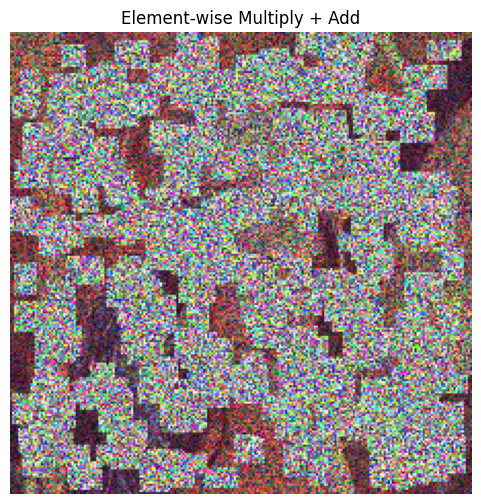

In [26]:
# Generate random weights and adds
height, width, channels = img_masked.shape
weights = np.random.rand(height, width, channels)  # float values between 0 and 1
adds = np.random.randint(0, 50, size=(height, width, channels))  # small random add

# Perform element-wise multiplication and addition
out = img_masked.astype(np.float64) * weights + adds


# Clip and convert to 8-bit
out = np.clip(out, 0, 255).astype(np.uint8)

# Ensure both are float for accurate subtraction
img_float = img.astype(np.float64)
out_float = out.astype(np.float64)

# Compute error
error = out_float - img_float
print(error.shape)  # Print the shape of the error image
learning_rate = 0.01
gradient = error / 255.0
# Example: simplified gradient descent update
weights = weights - learning_rate * gradient

# Display the output
plt.figure(figsize=(6, 6))  
plt.imshow(out)
plt.title("Element-wise Multiply + Add")
plt.axis('off')
plt.show()

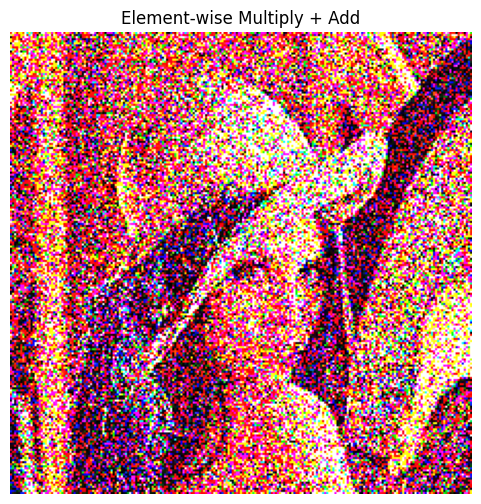

In [27]:
# Generate random weights and adds
height, width, channels = img_masked.shape
weights = np.random.rand(height, width, channels)  # float values between 0 and 1
adds = np.random.randint(0, 50, size=(height, width, channels))  # small random add

# Perform element-wise multiplication and addition
out = img_masked
img_float = img.astype(np.float64)

for i in range(1000):
    out = out.astype(np.float64) * weights + adds
    # Clip and convert to 8-bit
    out = np.clip(out, 0, 255).astype(np.uint8)

    # Ensure both are float for accurate subtraction
    
    out_float = out.astype(np.float64)

    # Compute error
    error = out_float - img_float
    #print(error.shape)  # Print the shape of the error image
    learning_rate = 0.01
    gradient = error * img.astype(np.float64)

    # Example: simplified gradient descent update
    weights = weights - learning_rate * gradient

# Display the output
plt.figure(figsize=(6, 6))  
plt.imshow(out)
plt.title("Element-wise Multiply + Add")
plt.axis('off')
plt.show()

Step 0, MSE Loss: 0.121264
Step 100, MSE Loss: 0.003023


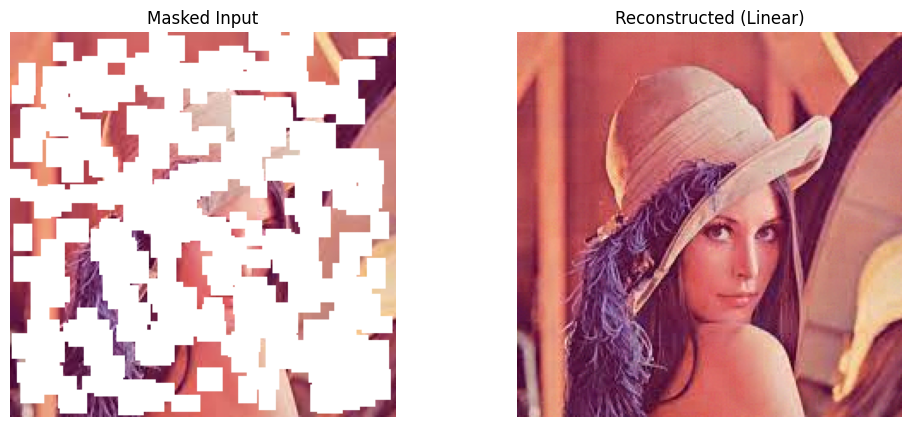

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare input
height, width, channels = img_masked.shape
img_float = img.astype(np.float64)
img_masked_float = img_masked.astype(np.float64)

# Normalize both images to [0, 1]
img_norm = img_float / 255.0
img_masked_norm = img_masked_float / 255.0

# Initialize learnable parameters
weights = np.random.rand(height, width, channels)
adds = np.random.rand(height, width, channels) * 0.1  # small bias

# Learning rates
lr_w = 0.01
lr_a = 0.01

loss_history = []

# Training loop
for i in range(200):
    # Forward pass: linear transformation
    out = img_masked_norm * weights + adds
    out = np.clip(out, 0, 1)

    # Compute error with respect to full image
    error = out - img_norm

    # Loss
    loss = np.mean(error**2)
    loss_history.append(loss)

    # Gradient
    grad_weights = error * img_masked_norm
    grad_adds = error

    # Update
    weights -= lr_w * grad_weights
    adds -= lr_a * grad_adds

    if i % 100 == 0:
        print(f"Step {i}, MSE Loss: {loss:.6f}")

# Final output
final_out = (out * 255).astype(np.uint8)

# Display result
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.imshow(final_out)
plt.title("Reconstructed (Linear)")
plt.axis('off')

plt.subplot(1, 2, 1)
plt.imshow(img_masked)
plt.title("Masked Input")
plt.axis('off')
plt.show()



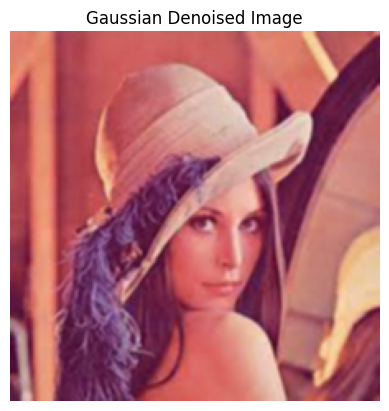

In [29]:
# Apply Gaussian Blur (kernel size should be odd: e.g., 3, 5, 7)
denoised = cv2.GaussianBlur(out, (3, 3), sigmaX=1)

# Show result
plt.imshow(denoised)
plt.title("Gaussian Denoised Image")
plt.axis('off')
plt.show()

Step 0, MSE Loss: 0.206062
Step 100, MSE Loss: 0.013595
Step 200, MSE Loss: 0.001223
Step 300, MSE Loss: 0.000351
Step 400, MSE Loss: 0.000133


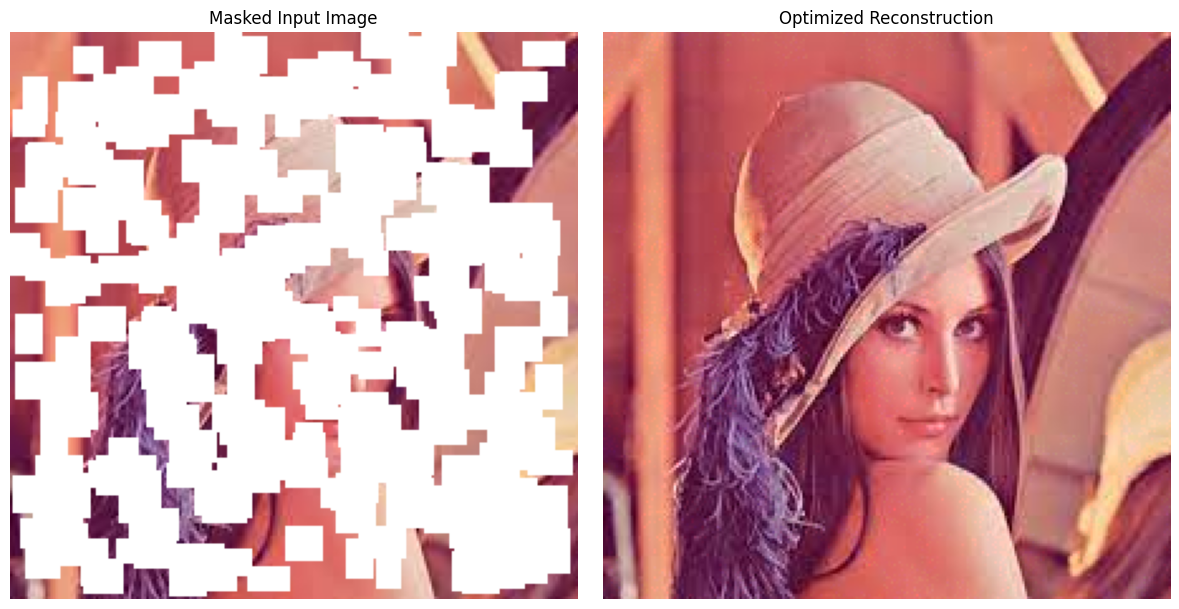

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming img_masked is already loaded
height, width, channels = img_masked.shape

# Convert input image to float64
img_float = img_masked.astype(np.float64)
originalImg = img.astype(np.float64)
# Normalize input image to [0, 1] for better training stability
img_norm = img_float / 255.0

# Initialize weights randomly (small values)
weight1 = np.random.rand(height, width, channels)
weight2 = np.random.rand(height, width, channels)
weight3 = np.random.rand(height, width, channels)
adds = np.random.rand(height, width, channels) * 0.2  # small bias

# Learning rates
lr1, lr2, lr3 = 1e-2, 1e-2, 1e-2
lr_add = 1e-2

# Training loop
loss_history = []
for i in range(500):
    # Polynomial features
    x1 = img_norm
    x2 = img_norm ** 2
    x3 = img_norm ** 3

    # Forward pass: non-linear transformation
    out = (weight1 * x1) + (weight2 * x2) + (weight3 * x3) + adds
    out = np.clip(out, 0, 1)

    # Compute error (difference from normalized image)
    error = out - (originalImg / 255.0)


    # Loss (MSE)
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Compute gradients
    grad_w1 = error * x1
    grad_w2 = error * x2
    grad_w3 = error * x3
    grad_add = error

    # Update weights
    weight1 -= lr1 * grad_w1
    weight2 -= lr2 * grad_w2
    weight3 -= lr3 * grad_w3
    adds    -= lr_add * grad_add

    # Optional: clamp if needed
    adds = np.clip(adds, 0, 1)

    # Print progress
    if i % 100 == 0:
        print(f"Step {i}, MSE Loss: {loss:.6f}")

# Denormalize final output
final_out = (out * 255).astype(np.uint8)

plt.figure(figsize=(12, 6))

# Show reconstructed output
plt.subplot(1, 2, 2)
plt.imshow(final_out)
plt.title("Optimized Reconstruction")
plt.axis('off')

# Show original (masked) input
plt.subplot(1, 2, 1)
plt.imshow(img_masked)
plt.title("Masked Input Image")
plt.axis('off')

plt.tight_layout()
plt.show()


